In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [230]:
data  = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [231]:
data.shape

(1338, 7)

In [232]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [233]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [235]:
data_cat = data.select_dtypes(include = 'object')
data_cat = data_cat.columns.tolist()
print('Categorical :', data_cat, '\n')

data_num = data.select_dtypes(exclude= 'object')
data_num = data_num.columns.tolist()
print('Numerical :', data_num)

Categorical : ['sex', 'smoker', 'region'] 

Numerical : ['age', 'bmi', 'children', 'expenses']


In [236]:
# dropping the duplicated rows
print('Data shape :', data.shape)

data.drop_duplicates(inplace = True)
print('Data shape after dropping duplicates :', data.shape)

Data shape : (1338, 7)
Data shape after dropping duplicates : (1337, 7)


In [237]:
#checking null nalues
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [238]:
data.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


# Exploratory Data Analysis

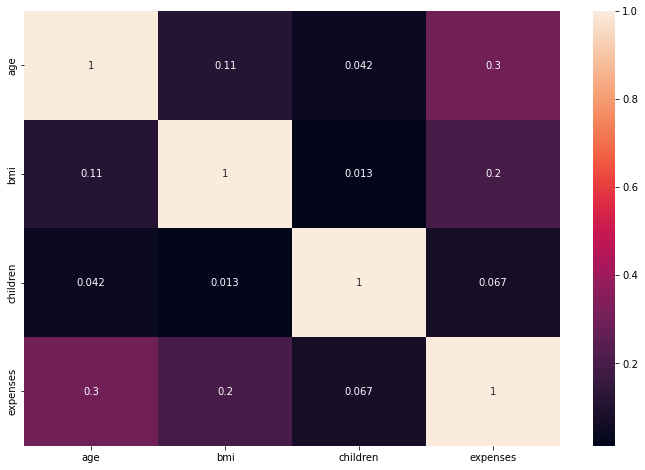

In [239]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

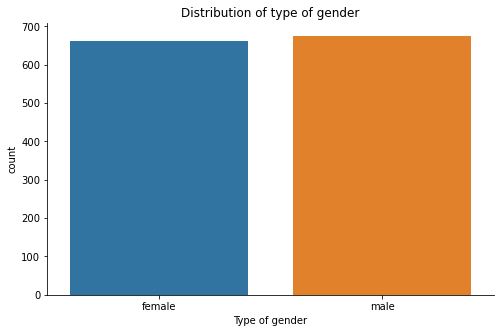

In [240]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'sex', data=data,
                order = data['sex'].value_counts(ascending = True).index)
plt.xlabel('Type of gender')
plt.title(f'Distribution of type of gender')
sns.despine()

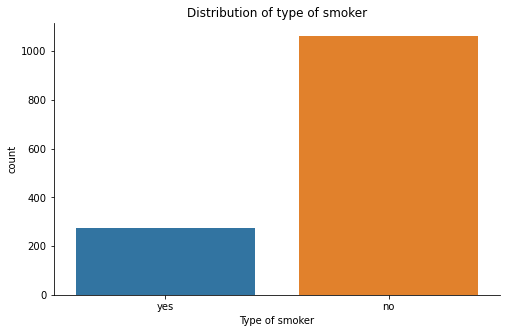

In [241]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'smoker', data=data,
                order = data['smoker'].value_counts(ascending = True).index)
plt.xlabel('Type of smoker')
plt.title(f'Distribution of type of smoker')
sns.despine()

In [242]:
fig = px.pie(data,values =data.value_counts(),names="region",title="Proportion of regionwise ")
fig.show()

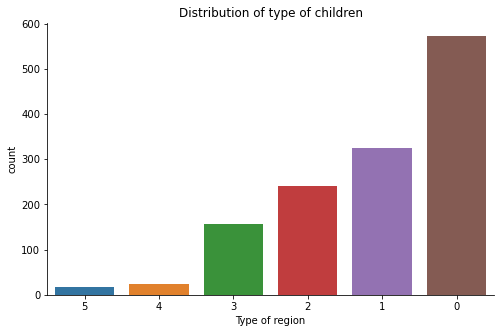

In [243]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'children', data=data,
                order = data['children'].value_counts(ascending = True).index)
plt.xlabel('Type of region')
plt.title(f'Distribution of type of children')
sns.despine()

<AxesSubplot:xlabel='age', ylabel='Count'>

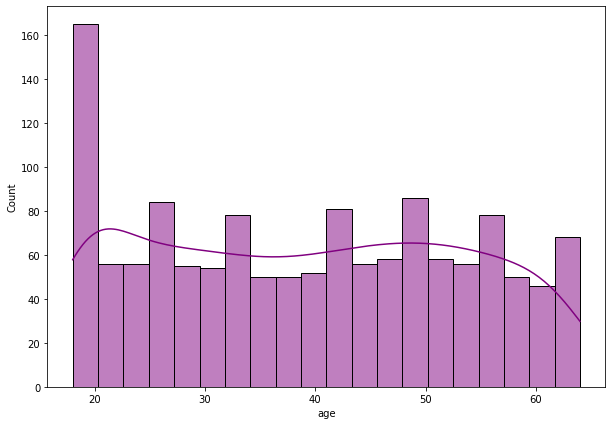

In [244]:
plt.figure(figsize = (10, 7))
sns.histplot(data=data, x="age", bins = 20, kde=True, color = 'purple')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

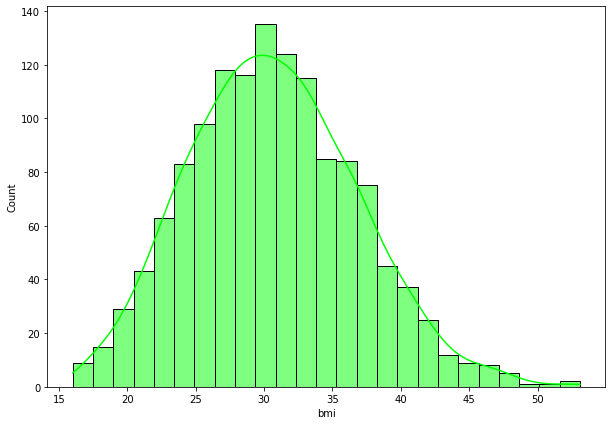

In [245]:
plt.figure(figsize = (10, 7))

sns.histplot(data=data, x="bmi",color='lime',kde=True,)

<AxesSubplot:xlabel='expenses', ylabel='Count'>

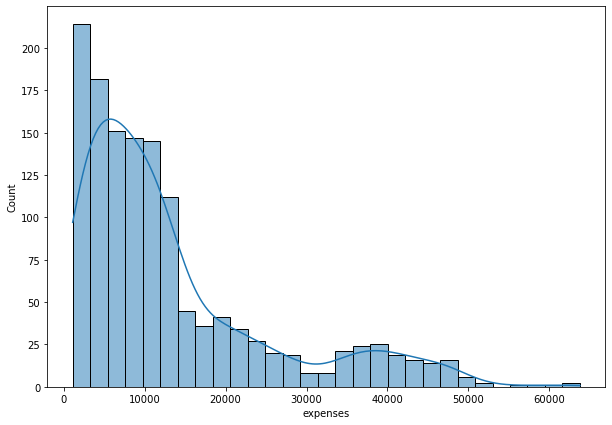

In [246]:
plt.figure(figsize = (10, 7))
sns.histplot(data=data, x="expenses", kde=True,)

# Features vs Target

<AxesSubplot:xlabel='sex', ylabel='expenses'>

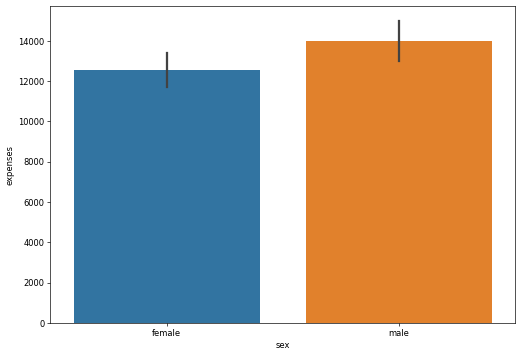

In [247]:
fig=plt.figure(figsize=(10,7),dpi=60)
sns.barplot(x = data.sex, y = data.expenses, order = data.groupby('sex')['expenses'].mean().reset_index().sort_values('expenses')['sex'])

<AxesSubplot:xlabel='children', ylabel='expenses'>

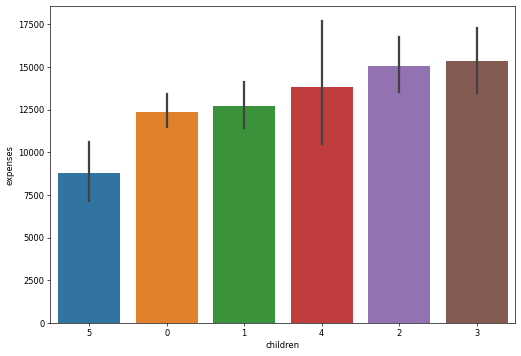

In [248]:
fig=plt.figure(figsize=(10,7),dpi=60)
sns.barplot(x = data.children, y = data.expenses, order = data.groupby('children')['expenses'].mean().reset_index().sort_values('expenses')['children'])

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

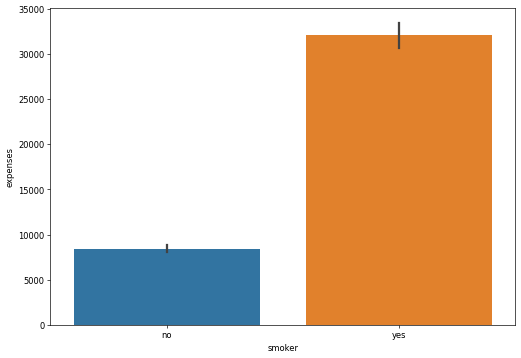

In [249]:
fig=plt.figure(figsize=(10,7),dpi=60)
sns.barplot(x = data.smoker, y = data.expenses, order = data.groupby('smoker')['expenses'].mean().reset_index().sort_values('expenses')['smoker'])

<AxesSubplot:xlabel='region', ylabel='expenses'>

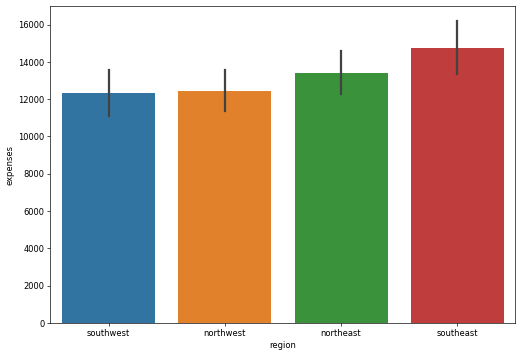

In [250]:
fig=plt.figure(figsize=(10,7),dpi=60)
sns.barplot(x = data.region, y = data.expenses, order = data.groupby('region')['expenses'].mean().reset_index().sort_values('expenses')['region'])

<AxesSubplot:xlabel='age', ylabel='expenses'>

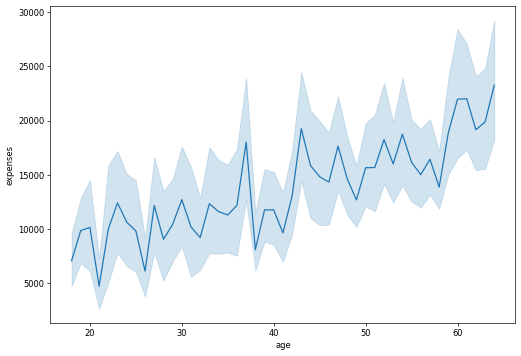

In [251]:
fig=plt.figure(figsize=(10,7),dpi=60)
sns.lineplot(data=data, x="age", y="expenses")

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

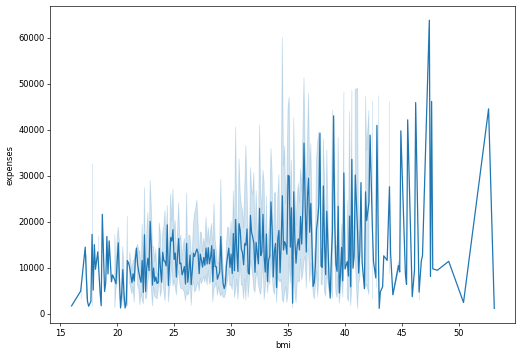

In [252]:
fig=plt.figure(figsize=(10,7),dpi=60)
sns.lineplot(data=data, x="bmi", y="expenses")

# Encoding

In [253]:
data.smoker = data.smoker.map({'yes':1,'no':0})

In [254]:
dummies1 = pd.get_dummies(data["sex"])
data= pd.concat([data,dummies1], axis=1)
data = data.drop('sex',axis=1)

In [255]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [256]:
data.region = data.region.map({'southwest':0,'southeast':2,'northwest':0, 'northeast':1})

In [257]:
data.head()

,age,bmi,children,smoker,region,expenses,female,male
0,19,27.9,0,1,0,16884.92,1,0
1,18,33.8,1,0,2,1725.55,0,1
2,28,33.0,3,0,2,4449.46,0,1
3,33,22.7,0,0,0,21984.47,0,1
4,32,28.9,0,0,0,3866.86,0,1


# Machine Learning

## Linear Regression

In [258]:
X = data[["age","bmi","children","smoker","region","female","male"]].values
y = data[["expenses"]].values

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [259]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [260]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7346246383630315


In [261]:
# regressor.predict([[20,33.6,2,0,1,0,1]])

## Decision Tree

In [262]:
X = data[["age","bmi","children","smoker","region","female","male"]].values
y = data[["expenses"]].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)


In [263]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test)

In [264]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.735940891491011


## KNN

In [265]:
X = data[["age","bmi","children","smoker","region","female","male"]].values
y = data[["expenses"]].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [266]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [267]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) 
  knn.fit(X_train,y_train) 
  print("K value  : " , i, " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1  score :  0.658039806316829
K value  :  2  score :  0.7550350878340822
K value  :  3  score :  0.7821102477986335
K value  :  4  score :  0.792255468016973
K value  :  5  score :  0.8017120761463769
K value  :  6  score :  0.8023928612878715
K value  :  7  score :  0.8027008994236347
K value  :  8  score :  0.8038223590494805
K value  :  9  score :  0.8020401504420386
K value  :  10  score :  0.8035718753727281
K value  :  20  score :  0.7884710534249904
K value  :  50  score :  0.712278655265411


In [268]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(8) 
knn.fit(X_train,y_train) 
y_pred=j=knn.predict(X_test)

In [269]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.817217689047753


## Bagging (Bootstrap aggregation)

In [270]:
X = data[["age","bmi","children","smoker","region","female","male"]].values
y = data[["expenses"]].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [271]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor(max_depth = 1, random_state=1), n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [272]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.5997911517784973


## Random Forest

In [273]:
X = data[["age","bmi","children","smoker","region","female","male"]].values
y = data[["expenses"]].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [274]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

C:\Users\Brinda\AppData\Local\Temp\ipykernel_4488\1141201735.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [275]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred1))


R2- SCORE: 0.5997911517784973


## Voting Regressor

In [276]:
from sklearn.ensemble import VotingRegressor 
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

In [277]:
X = data[["age","bmi","children","smoker","region","female","male"]].values
y = data[["expenses"]].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [278]:
model1 = LinearRegression()
model2 = tree.DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(3)
model4 = xgb.XGBRegressor(random_state=2)
model = VotingRegressor(estimators=[('lr', model1), ('dt', model2),('knn',model3),('xgb',model4)])
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)

C:\Users\Brinda\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [279]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7647910754108944


## Xgboost

In [280]:
X = data[["age","bmi","children","smoker","region","female","male"]].values
y = data[["expenses"]].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 5)

In [281]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1,1.5,2,2.5]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.5854365065964868  Cross-Val score :  0.5481145977277049
Learning rate :  0.02  Train score :  0.8576288315184495  Cross-Val score :  0.798851138718655
Learning rate :  0.03  Train score :  0.9083499891533464  Cross-Val score :  0.8303909348579117
Learning rate :  0.04  Train score :  0.9234777033135152  Cross-Val score :  0.8330586221534686
Learning rate :  0.05  Train score :  0.9292419220255338  Cross-Val score :  0.8293139472453147
Learning rate :  0.1  Train score :  0.963969266452742  Cross-Val score :  0.8088684922770104
Learning rate :  0.11  Train score :  0.965849303392465  Cross-Val score :  0.8081346065557259
Learning rate :  0.12  Train score :  0.9703008092377197  Cross-Val score :  0.8086498974209624
Learning rate :  0.13  Train score :  0.9722072214928033  Cross-Val score :  0.802040243199597
Learning rate :  0.14  Train score :  0.9763501173492103  Cross-Val score :  0.8006921129569994
Learning rate :  0.15  Train score :  0.97973

In [282]:
model = xgb.XGBRegressor(learning_rate = 0.1, n_estimators=100, verbosity = 0)
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8362007257183085


## ALl Models' R2 Score

In [283]:
Model = pd.DataFrame({'model_name':['LinearRegression','DecissionTree','KNN',"Bagging",'RandomForest','Voting Classifier',"Xgboost"],'r2_score':[0.734,0.748,0.817,0.599,0.599,0.764,0.836 ]})
Model

,model_name,r2_score
0,LinearRegression,0.734
1,DecissionTree,0.748
2,KNN,0.817
3,Bagging,0.599
4,RandomForest,0.599
5,Voting Classifier,0.764
6,Xgboost,0.836


#### We found that the Xgboost model was the best fit model with the best R2 value of 83.62%.